## Imports

In [1]:
import os
import glob

import matplotlib.pyplot as plt
import networkx as nx

## Load datasets

### FA2 paper datasets

In [2]:
def load_network_from_adjacency(filepath: str, is_directed=True, sep=" ") -> nx.Graph:
    with open(filepath) as file:
        G = nx.DiGraph() if is_directed else nx.Graph()
        for line in file:
            if line.startswith('#'): continue
            line = line.rstrip('\n')
            n1, n2, *_ = line.split()
            G.add_edge(n1, n2)
    return G

In [3]:
FA2_ROOT = "/Volumes/DATA/SNACS datasets/FA2 datasets/"

#### Extract Basic Infos

In [4]:
def extract_info(G: nx.Graph):
    nodes = G.number_of_nodes()
    edges = G.number_of_edges()
    avg_degree = sum(dict(G.degree()).values()) / float(nodes)
    return nodes, edges, avg_degree

#### Structures for Data Exploration

In [5]:
networks_info = {}

#### Facebook

In [6]:
fb_path = FA2_ROOT + "facebook/*.edges"
fb_files = glob.glob(fb_path)
fb_networks = []
for file in fb_files:
    fb_networks.append(load_network_from_adjacency(filepath=file, is_directed=False))

In [7]:
for file, network in zip(fb_files, fb_networks):
    n, e, avg_d = extract_info(network)
    networks_info[os.path.basename(file)] = [n, e, avg_d]
    print(f"Network {os.path.basename(file)} has {n} nodes, {e} edges, and an average degree of {avg_d}.")
    nx.write_gexf(network, path="gephi/" + os.path.basename(file).replace('.edges', ".gexf"))

Network 0.edges has 333 nodes, 2519 edges, and an average degree of 15.12912912912913.
Network 348.edges has 224 nodes, 3192 edges, and an average degree of 28.5.
Network 414.edges has 150 nodes, 1693 edges, and an average degree of 22.573333333333334.
Network 698.edges has 61 nodes, 270 edges, and an average degree of 8.852459016393443.
Network 107.edges has 1034 nodes, 26749 edges, and an average degree of 51.73887814313346.
Network 3437.edges has 534 nodes, 4813 edges, and an average degree of 18.026217228464418.
Network 3980.edges has 52 nodes, 146 edges, and an average degree of 5.615384615384615.
Network 1912.edges has 747 nodes, 30025 edges, and an average degree of 80.38821954484605.
Network 1684.edges has 786 nodes, 14024 edges, and an average degree of 35.68447837150127.
Network 686.edges has 168 nodes, 1656 edges, and an average degree of 19.714285714285715.


#### Twitter

In [8]:
twitter_path = FA2_ROOT + "twitter_use/*.edges"
twitter_files = glob.glob(twitter_path)
twitter_networks = []
for file in twitter_files:
    twitter_networks.append(load_network_from_adjacency(filepath=file, is_directed=True))

In [9]:
for file, network in zip(twitter_files, twitter_networks):
    n, e, avg_d = extract_info(network)
    networks_info[os.path.basename(file)] = [n, e, avg_d]
    print(f"Network {os.path.basename(file)} has {n} nodes, {e} edges, and an average degree of {avg_d}.")
    nx.write_gexf(network, path="gephi/" + os.path.basename(file).replace('.edges', ".gexf"))

Network 21420959.edges has 91 nodes, 1787 edges, and an average degree of 39.27472527472528.
Network 24117694.edges has 246 nodes, 9630 edges, and an average degree of 78.29268292682927.
Network 15053535.edges has 18 nodes, 26 edges, and an average degree of 2.888888888888889.
Network 215328630.edges has 10 nodes, 33 edges, and an average degree of 6.6.
Network 248883350.edges has 184 nodes, 9042 edges, and an average degree of 98.28260869565217.
Network 15924858.edges has 10 nodes, 39 edges, and an average degree of 7.8.
Network 430313102.edges has 51 nodes, 1646 edges, and an average degree of 64.54901960784314.
Network 23503181.edges has 101 nodes, 1824 edges, and an average degree of 36.118811881188115.
Network 163374693.edges has 164 nodes, 1749 edges, and an average degree of 21.329268292682926.
Network 314316607.edges has 235 nodes, 15957 edges, and an average degree of 135.80425531914895.
Network 256497288.edges has 213 nodes, 17930 edges, and an average degree of 168.356807511

#### Oregon-2

In [10]:
oregon_path = FA2_ROOT + "oregon/*.txt"
oregon_files = glob.glob(oregon_path)
oregon_networks = []
for file in oregon_files:
    oregon_networks.append(load_network_from_adjacency(file, is_directed=False))

In [11]:
for file, network in zip(oregon_files, oregon_networks):
    n, e, avg_d = extract_info(network)
    networks_info[os.path.basename(file)] = [n, e, avg_d]
    print(f"Network {os.path.basename(file)} has {n} nodes, {e} edges, and an average degree of {avg_d}.")
    nx.write_gexf(network, path="gephi/" + os.path.basename(file).replace('.txt', ".gexf"))

Network oregon2_010331.txt has 10900 nodes, 31180 edges, and an average degree of 5.721100917431193.
Network oregon2_010407.txt has 10981 nodes, 30855 edges, and an average degree of 5.619706766232584.
Network oregon2_010428.txt has 11113 nodes, 31434 edges, and an average degree of 5.657158283091874.
Network oregon2_010505.txt has 11157 nodes, 30943 edges, and an average degree of 5.546831585551671.
Network oregon2_010512.txt has 11260 nodes, 31303 edges, and an average degree of 5.560035523978685.
Network oregon2_010519.txt has 11375 nodes, 32287 edges, and an average degree of 5.676835164835165.
Network oregon2_010526.txt has 11461 nodes, 32730 edges, and an average degree of 5.711543495331996.
Network oregon2_010414.txt has 11019 nodes, 31761 edges, and an average degree of 5.764769942826028.
Network oregon2_010421.txt has 11080 nodes, 31538 edges, and an average degree of 5.692779783393502.


#### COND-MAT

In [12]:
cond_mat_file = FA2_ROOT + "COND-MAT/ca-CondMat.txt"
cond_mat_network = load_network_from_adjacency(filepath=cond_mat_file, is_directed=False)
n, e, avg_d = extract_info(cond_mat_network)
networks_info[os.path.basename(cond_mat_file)] = [n, e, avg_d]
print(f"Network {os.path.basename(cond_mat_file)} has {n} nodes, {e} edges, and an average degree of {avg_d}.")
nx.write_gexf(cond_mat_network, path="gephi/" + os.path.basename(cond_mat_file).replace('.txt', ".gexf"))

Network ca-CondMat.txt has 23133 nodes, 93497 edges, and an average degree of 8.083430596982666.


#### GR-QC

In [13]:
gr_qc_file = FA2_ROOT + "GR-QC/ca-GrQc.txt"
gr_qc_network = load_network_from_adjacency(filepath=gr_qc_file, is_directed=False)
n, e, avg_d = extract_info(gr_qc_network)
networks_info[os.path.basename(gr_qc_file)] = [n, e, avg_d]
print(f"Network {os.path.basename(gr_qc_file)} has {n} nodes, {e} edges, and an average degree of {avg_d}.")
nx.write_gexf(gr_qc_network, path="gephi/" + os.path.basename(gr_qc_file).replace('.txt', ".gexf"))

Network ca-GrQc.txt has 5242 nodes, 14496 edges, and an average degree of 5.530713468141931.


#### HEP-PH

In [14]:
hep_ph_file = FA2_ROOT + "HEP-PH/ca-HepPh.txt"
hep_ph_network = load_network_from_adjacency(filepath=hep_ph_file, is_directed=False)
n, e, avg_d = extract_info(hep_ph_network)
networks_info[os.path.basename(hep_ph_file)] = [n, e, avg_d]
print(f"Network {os.path.basename(hep_ph_file)} has {n} nodes, {e} edges, and an average degree of {avg_d}.")
nx.write_gexf(hep_ph_network, path="gephi/" + os.path.basename(hep_ph_file).replace('.txt', ".gexf"))

Network ca-HepPh.txt has 12008 nodes, 118521 edges, and an average degree of 19.740339773484344.


#### Yeast

In [15]:
def load_yeast(filepath: str) -> nx.DiGraph:
    with open(file=filepath) as file:
        G = nx.DiGraph()
        edges = False
        for line in file:
            if line.startswith("*edges"):
                edges = True
                continue
            if edges:
                line = line.rstrip('\n')
                n1, n2 = line.split()
                G.add_edge(n1, n2)
        return G


yeast_file = FA2_ROOT + "yeast/YeastS.net"
yeast_network = load_yeast(filepath=yeast_file)
n, e, avg_d = extract_info(yeast_network)
networks_info[os.path.basename(yeast_file)] = [n, e, avg_d]
print(f"Network {os.path.basename(yeast_file)} has {n} nodes, {e} edges, and an average degree of {avg_d}.")
nx.write_gexf(yeast_network, path="gephi/yeast.gexf")

Network YeastS.net has 2361 nodes, 7182 edges, and an average degree of 6.083862770012707.


#### Gephi Format files

In [16]:
networks_info[os.path.basename('celegans')] = [306, 2345, 7.663]
networks_info[os.path.basename('mavel')] = [10469, 178115, 34.027]

#### Data Exploration

In [17]:
networks_info

{'0.edges': [333, 2519, 15.12912912912913],
 '348.edges': [224, 3192, 28.5],
 '414.edges': [150, 1693, 22.573333333333334],
 '698.edges': [61, 270, 8.852459016393443],
 '107.edges': [1034, 26749, 51.73887814313346],
 '3437.edges': [534, 4813, 18.026217228464418],
 '3980.edges': [52, 146, 5.615384615384615],
 '1912.edges': [747, 30025, 80.38821954484605],
 '1684.edges': [786, 14024, 35.68447837150127],
 '686.edges': [168, 1656, 19.714285714285715],
 '21420959.edges': [91, 1787, 39.27472527472528],
 '24117694.edges': [246, 9630, 78.29268292682927],
 '15053535.edges': [18, 26, 2.888888888888889],
 '215328630.edges': [10, 33, 6.6],
 '248883350.edges': [184, 9042, 98.28260869565217],
 '15924858.edges': [10, 39, 7.8],
 '430313102.edges': [51, 1646, 64.54901960784314],
 '23503181.edges': [101, 1824, 36.118811881188115],
 '163374693.edges': [164, 1749, 21.329268292682926],
 '314316607.edges': [235, 15957, 135.80425531914895],
 '256497288.edges': [213, 17930, 168.3568075117371],
 '96545499.edge

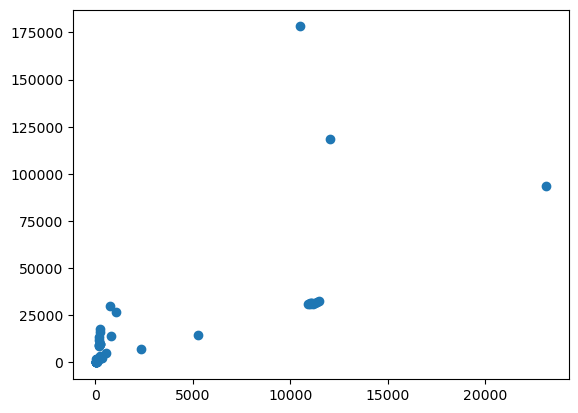

In [18]:
nodes, edges = [], []
for v in networks_info.values():
    nodes.append(v[0])
    edges.append(v[1])
plt.scatter(nodes, edges)

### New datasets

#### Imports

In [19]:
def load_network_from_csv(filepath: str, is_directed=True):
    with open(filepath) as file:
        G = nx.DiGraph() if is_directed else nx.Graph()
        for line in file:
            if line.startswith("#") or ("source" in line and "target" in line) or "id" in line:
                continue
            line = line.rstrip('\n')
            n1, n2, *_ = line.split(',')
            G.add_edge(n1, n2)
        return G

In [20]:
n_networks_info = {}

In [21]:
NEW_DB_ROOT = "/Volumes/DATA/SNACS datasets/new datasets/"

#### cit-HepPh

In [22]:
cit_hepph_file = NEW_DB_ROOT + "cit-HepPh/cit-HepPh.txt"
cit_hepph_network = load_network_from_adjacency(filepath=cit_hepph_file, is_directed=True)
n, e, avg_d = extract_info(cit_hepph_network)
n_networks_info[os.path.basename(cit_hepph_file)] = [n, e, avg_d]
print(f"Network {os.path.basename(cit_hepph_file)} has {n} nodes, {e} edges, and an average degree of {avg_d}.")
nx.write_gexf(cit_hepph_network, path="gephi/" + os.path.basename(cit_hepph_file).replace('.txt', ".gexf"))

Network cit-HepPh.txt has 34546 nodes, 421578 edges, and an average degree of 24.406761998494762.


#### cit-HepTh

In [23]:
cit_hepth_file = NEW_DB_ROOT + "cit-HepTh/cit-HepTh.txt"
cit_hepth_network = load_network_from_adjacency(filepath=cit_hepth_file, is_directed=True)
n, e, avg_d = extract_info(cit_hepth_network)
n_networks_info[os.path.basename(cit_hepth_file)] = [n, e, avg_d]
print(f"Network {os.path.basename(cit_hepth_file)} has {n} nodes, {e} edges, and an average degree of {avg_d}.")
nx.write_gexf(cit_hepth_network, path="gephi/" + os.path.basename(cit_hepph_file).replace('.txt', ".gexf"))

Network cit-HepTh.txt has 27770 nodes, 352807 edges, and an average degree of 25.409218581202737.


#### email-Enro

In [24]:
email_enron_file = NEW_DB_ROOT + "email-Enron/email-Enron.txt"
email_enron_network = load_network_from_adjacency(filepath=email_enron_file, is_directed=True)
n, e, avg_d = extract_info(email_enron_network)
n_networks_info[os.path.basename(email_enron_file)] = [n, e, avg_d]
print(f"Network {os.path.basename(email_enron_file)} has {n} nodes, {e} edges, and an average degree of {avg_d}.")
nx.write_gexf(email_enron_network, path="gephi/" + os.path.basename(email_enron_file).replace('.txt', ".gexf"))

Network email-Enron.txt has 36692 nodes, 367662 edges, and an average degree of 20.040444783604055.


#### p2p-Gnutella24

In [25]:
p2p_Gnutella24_file = NEW_DB_ROOT + "p2p-Gnutella24/p2p-Gnutella24.txt"
p2p_Gnutella24_network = load_network_from_adjacency(filepath=p2p_Gnutella24_file, is_directed=True)
n, e, avg_d = extract_info(p2p_Gnutella24_network)
n_networks_info[os.path.basename(p2p_Gnutella24_file)] = [n, e, avg_d]
print(f"Network {os.path.basename(p2p_Gnutella24_file)} has {n} nodes, {e} edges, and an average degree of {avg_d}.")
nx.write_gexf(p2p_Gnutella24_network, path="gephi/" + os.path.basename(p2p_Gnutella24_file).replace('.txt', ".gexf"))

Network p2p-Gnutella24.txt has 26518 nodes, 65369 edges, and an average degree of 4.930160645599216.


#### p2p-Gnutella25

In [26]:
p2p_Gnutella25_file = NEW_DB_ROOT + "p2p-Gnutella25/p2p-Gnutella25.txt"
p2p_Gnutella25_network = load_network_from_adjacency(filepath=p2p_Gnutella25_file, is_directed=True)
n, e, avg_d = extract_info(p2p_Gnutella25_network)
n_networks_info[os.path.basename(p2p_Gnutella25_file)] = [n, e, avg_d]
print(f"Network {os.path.basename(p2p_Gnutella25_file)} has {n} nodes, {e} edges, and an average degree of {avg_d}.")
nx.write_gexf(p2p_Gnutella25_network, path="gephi/" + os.path.basename(p2p_Gnutella25_file).replace('.txt', ".gexf"))

Network p2p-Gnutella25.txt has 22687 nodes, 54705 edges, and an average degree of 4.822585621721691.


#### sx-mathoverflow

In [27]:
sx_mathoverflow_file = NEW_DB_ROOT + "sx-mathoverflow/sx-mathoverflow.txt"
sx_mathoverflow_network = load_network_from_adjacency(filepath=sx_mathoverflow_file, is_directed=True)
n, e, avg_d = extract_info(sx_mathoverflow_network)
n_networks_info[os.path.basename(sx_mathoverflow_file)] = [n, e, avg_d]
print(f"Network {os.path.basename(sx_mathoverflow_file)} has {n} nodes, {e} edges, and an average degree of {avg_d}.")
nx.write_gexf(sx_mathoverflow_network, path="gephi/" + os.path.basename(sx_mathoverflow_file).replace('.txt', ".gexf"))

Network sx-mathoverflow.txt has 24818 nodes, 239978 edges, and an average degree of 19.339028124748168.


#### sx-mathoverflow-a2q

In [28]:
sx_mathoverflow_a2q_file = NEW_DB_ROOT + "sx-mathoverflow-a2q/sx-mathoverflow-a2q.txt"
sx_mathoverflow_a2q_network = load_network_from_adjacency(filepath=sx_mathoverflow_a2q_file, is_directed=True)
n, e, avg_d = extract_info(sx_mathoverflow_a2q_network)
n_networks_info[os.path.basename(sx_mathoverflow_a2q_file)] = [n, e, avg_d]
print(f"Network {os.path.basename(sx_mathoverflow_a2q_file)} has {n} nodes, {e} edges, and an average degree of {avg_d}.")
nx.write_gexf(sx_mathoverflow_a2q_network, path="gephi/" + os.path.basename(sx_mathoverflow_a2q_file).replace('.txt', ".gexf"))

Network sx-mathoverflow-a2q.txt has 21688 nodes, 90489 edges, and an average degree of 8.344614533382515.


#### sx-mathoverflow-c2a

In [29]:
sx_mathoverflow_c2a_file = NEW_DB_ROOT + "sx-mathoverflow-c2a/sx-mathoverflow-c2a.txt"
sx_mathoverflow_c2a_network = load_network_from_adjacency(filepath=sx_mathoverflow_c2a_file, is_directed=True)
n, e, avg_d = extract_info(sx_mathoverflow_c2a_network)
n_networks_info[os.path.basename(sx_mathoverflow_c2a_file)] = [n, e, avg_d]
print(f"Network {os.path.basename(sx_mathoverflow_c2a_file)} has {n} nodes, {e} edges, and an average degree of {avg_d}.")
nx.write_gexf(sx_mathoverflow_c2a_network, path="gephi/" + os.path.basename(sx_mathoverflow_c2a_file).replace('.txt', ".gexf"))

Network sx-mathoverflow-c2a.txt has 13840 nodes, 81121 edges, and an average degree of 11.722687861271677.


#### sx-mathoverflow-c2q

In [30]:
sx_mathoverflow_c2q_file = NEW_DB_ROOT + "sx-mathoverflow-c2q/sx-mathoverflow-c2q.txt"
sx_mathoverflow_c2q_network = load_network_from_adjacency(filepath=sx_mathoverflow_c2q_file, is_directed=True)
n, e, avg_d = extract_info(sx_mathoverflow_c2q_network)
n_networks_info[os.path.basename(sx_mathoverflow_c2q_file)] = [n, e, avg_d]
print(f"Network {os.path.basename(sx_mathoverflow_c2q_file)} has {n} nodes, {e} edges, and an average degree of {avg_d}.")
nx.write_gexf(sx_mathoverflow_c2q_network, path="gephi/" + os.path.basename(sx_mathoverflow_c2q_file).replace('.txt', ".gexf"))

Network sx-mathoverflow-c2q.txt has 16836 nodes, 101329 edges, and an average degree of 12.037182228557851.


#### facebook-large

In [31]:
facebook_musae_file = NEW_DB_ROOT + "facebook_large/musae_facebook_edges.csv"
facebook_musae_network = load_network_from_csv(filepath=facebook_musae_file, is_directed=False)
n, e, avg_d = extract_info(facebook_musae_network)
n_networks_info[os.path.basename(facebook_musae_file)] = [n, e, avg_d]
print(f"Network {os.path.basename(facebook_musae_file)} has {n} nodes, {e} edges, and an average degree of {avg_d}.")
nx.write_gexf(facebook_musae_network, path="gephi/" + os.path.basename(facebook_musae_file).replace('.csv', ".gexf"))

Network musae_facebook_edges.csv has 22470 nodes, 171002 edges, and an average degree of 15.220471740097908.


#### Data Exploration

In [32]:
n_networks_info

{'cit-HepPh.txt': [34546, 421578, 24.406761998494762],
 'cit-HepTh.txt': [27770, 352807, 25.409218581202737],
 'email-Enron.txt': [36692, 367662, 20.040444783604055],
 'p2p-Gnutella24.txt': [26518, 65369, 4.930160645599216],
 'p2p-Gnutella25.txt': [22687, 54705, 4.822585621721691],
 'sx-mathoverflow.txt': [24818, 239978, 19.339028124748168],
 'sx-mathoverflow-a2q.txt': [21688, 90489, 8.344614533382515],
 'sx-mathoverflow-c2a.txt': [13840, 81121, 11.722687861271677],
 'sx-mathoverflow-c2q.txt': [16836, 101329, 12.037182228557851],
 'musae_facebook_edges.csv': [22470, 171002, 15.220471740097908]}